## Data Extraction

In [7]:
import numpy as np
import pandas as pd
import datetime

In [8]:
df = pd.read_csv('signal.csv')  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Signal_value  10000 non-null  float64
 1   Date          10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [10]:
df.head()

,Signal_value,Date
0,14.357500,20190628
1,14.176000,20190628
2,14.399231,20190628
3,14.384800,20190628
4,13.798400,20190628


## Data Preparation

In [11]:
df = df.sort_values(by='Date', ascending=True)
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [13]:
df.Date.dtype

dtype('<M8[ns]')

In [23]:
# df.groupby(['Date'])['Date','Signal_value'].min()

In [26]:
df.index = df.Date
df.Signal_value = df.resample('D')['Signal_value'].min()
df = df.drop_duplicates()
df = df.asfreq('D')
df = df.ffill(axis = 0)

## Data Visualisation

In [27]:
import plotly.graph_objects as go

In [29]:
trace1 = go.Scatter(
    x = df.index,
    y = df['Signal_value'],
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = 'Signal Timeseries',
    xaxis = {'title' : "Date"},
    yaxis = {'title' : 'Signal'}
)
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [30]:
df.index = df.Date
df = df.drop(['Date'],axis = 1)

In [31]:
train_size = int(len(df) * 0.85)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)


(232, 1) (42, 1)


In [33]:
train['Signal_value'].values.reshape(-1,1)

array([[13.4125    ],
       [12.92307692],
       [13.72588235],
       [13.72588235],
       [13.72588235],
       [13.72588235],
       [13.72588235],
       [12.6       ],
       [12.2       ],
       [12.252     ],
       [12.17      ],
       [12.35      ],
       [13.332     ],
       [13.4728    ],
       [13.4728    ],
       [12.445     ],
       [13.0728    ],
       [13.36307692],
       [13.08846154],
       [13.58846154],
       [13.58846154],
       [12.97461538],
       [12.302     ],
       [14.05      ],
       [13.3975    ],
       [13.30947368],
       [13.30947368],
       [13.30947368],
       [12.48538462],
       [12.54666667],
       [12.78230769],
       [12.93692308],
       [13.05454545],
       [12.75      ],
       [12.75      ],
       [12.54      ],
       [12.572     ],
       [12.656     ],
       [12.30666667],
       [12.30666667],
       [12.30666667],
       [12.30666667],
       [12.30666667],
       [12.30666667],
       [12.30666667],
       [12

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train['Signal_value'].values.reshape(-1,1))

In [35]:


train['Signal_value'] = scaler.transform(train[['Signal_value']])
test['Signal_value'] = scaler.transform(test[['Signal_value']])

/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
len(test)

42

In [37]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [38]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['Signal_value']], train.Signal_value, TIME_STEPS)
X_test, y_test = create_dataset(test[['Signal_value']], test.Signal_value, TIME_STEPS)

print(X_train.shape)

(202, 30, 1)


In [39]:
X_test

array([[[ 1.46184954],
        [ 1.46184954],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.42882401],
        [ 0.40365398],
        [ 0.33847458],
        [ 0.09870864],
        [ 0.19956575],
        [ 0.19956575],
        [ 0.19956575],
        [ 0.33794753],
        [ 0.20553906],
        [ 1.22579585],
        [ 1.4101574 ],
        [ 0.01064055],
        [ 0.01064055],
        [ 0.01064055],
        [ 0.11402483],
        [ 0.81378325],
        [-0.10450438],
        [ 0.81979486],
        [ 0.81169468],
        [ 0.81169468],
        [ 0.81169468],
        [ 0.06041816],
        [ 0.03179148],
        [ 0.22698173]],

       [[ 1.46184954],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.40632835],
        [ 1.42882401],
        [ 0.40365398],
        [ 0.33847458],
        [ 0.09870864],
        [ 0.19956575],
        [ 0.19956575],
        [ 0.19956575],
        [ 0.33794753],
        [

In [40]:
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [41]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=128, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [42]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Train on 181 samples, validate on 21 samples
Epoch 1/50
181/181 [==============================] - 3s 14ms/sample - loss: 0.7321 - val_loss: 0.3325
Epoch 2/50
181/181 [==============================] - 0s 974us/sample - loss: 0.5503 - val_loss: 0.2553
Epoch 3/50
181/181 [==============================] - 0s 940us/sample - loss: 0.4781 - val_loss: 0.3559
Epoch 4/50
181/181 [==============================] - 0s 935us/sample - loss: 0.4663 - val_loss: 0.2337
Epoch 5/50
181/181 [==============================] - 0s 925us/sample - loss: 0.4527 - val_loss: 0.2796
Epoch 6/50
181/181 [==============================] - 0s 927us/sample - loss: 0.4443 - val_loss: 0.1878
Epoch 7/50
181/181 [==============================] - 0s 931us/sample - loss: 0.4412 - val_loss: 0.1977
Epoch 8/50
181/181 [==============================] - 0s 946us/sample - loss: 0.4230 - val_loss: 0.1930
Epoch 9/50
181/181 [==============================] - 0s 925us/sample - loss: 0.4281 - val_loss: 0.1504
Epoch 10/50
181/181 

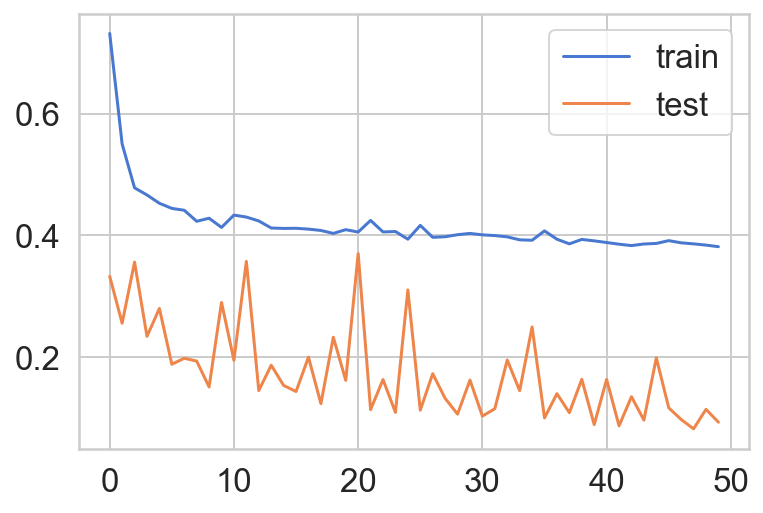

In [43]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [44]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

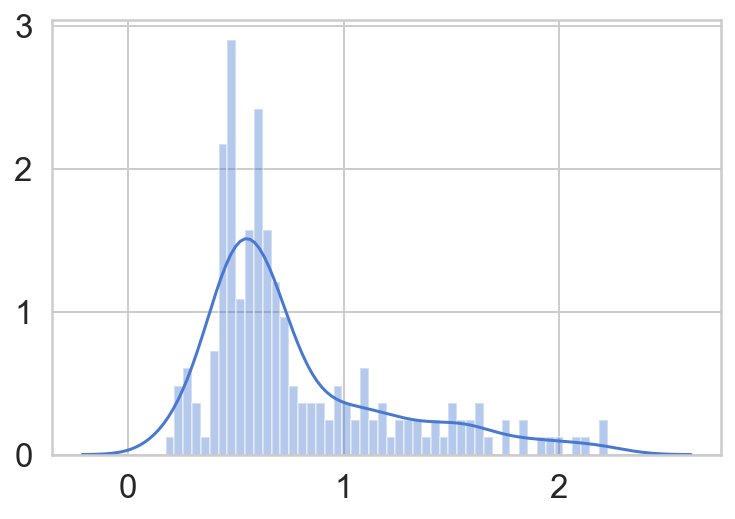

In [45]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [46]:
X_test_pred = model.predict(X_test)

In [47]:
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [54]:
THRESHOLD = 0.53

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['Signal_value'] = test[TIME_STEPS:].Signal_value

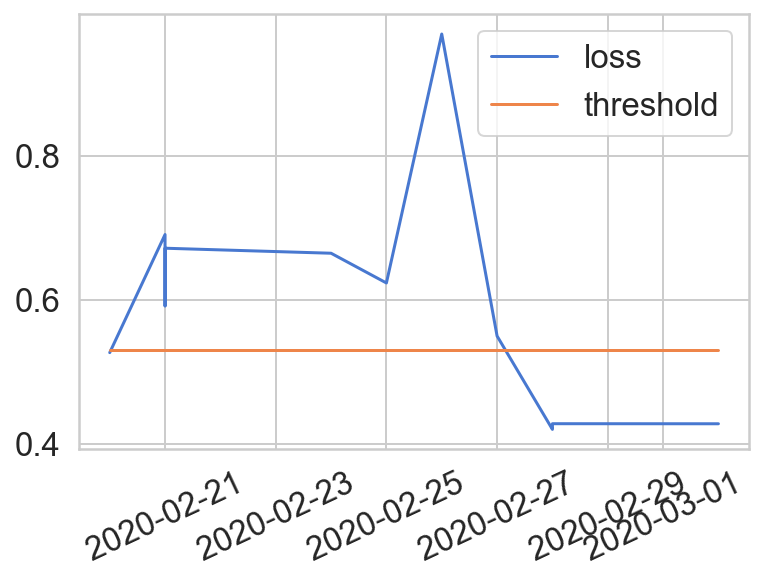

In [55]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [56]:
test_score_df

,loss,threshold,anomaly,Signal_value
Date,,,,
2020-02-20,0.526659,0.53,False,1.221998
2020-02-21,0.690643,0.53,True,-0.282282
2020-02-21,0.591552,0.53,True,-0.282282
2020-02-21,0.671642,0.53,True,-0.282282
2020-02-24,0.664684,0.53,True,1.105748
2020-02-25,0.623399,0.53,True,-1.272856
2020-02-26,0.969028,0.53,True,0.057546
2020-02-27,0.549744,0.53,True,0.249956
2020-02-28,0.420149,0.53,False,0.431836


In [57]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,Signal_value
Date,,,,
2020-02-21,0.690643,0.53,True,-0.282282
2020-02-21,0.591552,0.53,True,-0.282282
2020-02-21,0.671642,0.53,True,-0.282282
2020-02-24,0.664684,0.53,True,1.105748
2020-02-25,0.623399,0.53,True,-1.272856


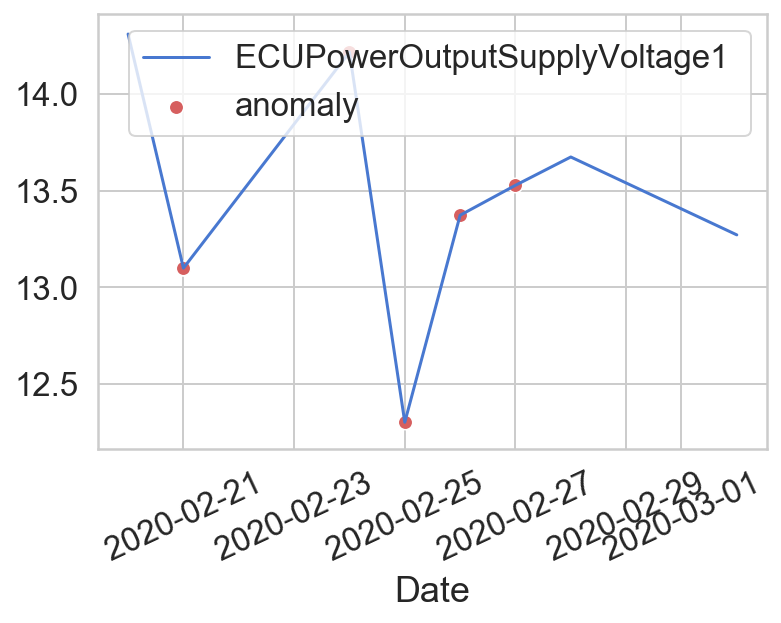

In [58]:
plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].Signal_value), 
  label='ECUPowerOutputSupplyVoltage1 '
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.Signal_value),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();